## Given a bank customer, build a neural network-based classifier that can
# determine whether they will leave or not in the next 6 months

In [ ]:
## importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Read the dataset

df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Dataset Description:
contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore,
Geography, Gender, Age, Tenure, Balance, etc.

Preprocessing

In [ ]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
##Dropping the unnecessary columns

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Visualization

In [ ]:
def visualization(x,y,xlabel):
  plt.figure(figsize=(10,5))
  plt.hist([x,y], color=['red','green'], label = ['exit', 'not_exit'])
  plt.xlabel(xlabel,fontsize=20)
  plt.ylabel("no. of customers", fontsize=20)
  plt.legend()
  plt.show()

In [ ]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

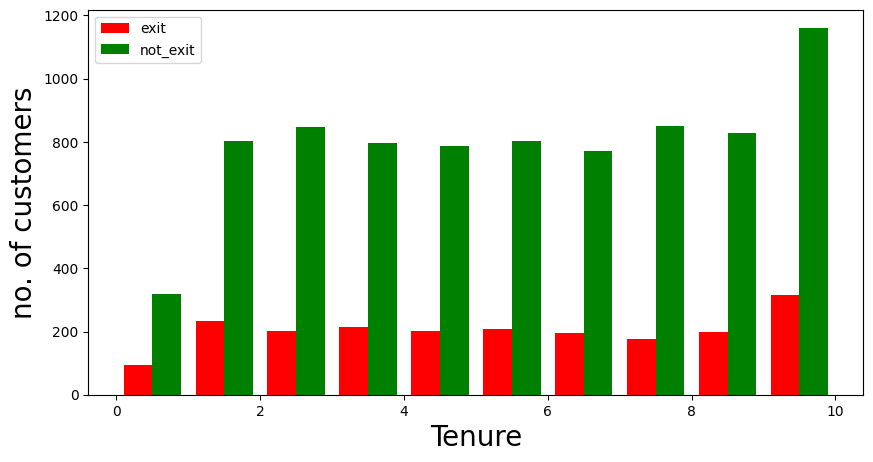

In [ ]:
visualization(df_churn_exited,df_churn_not_exited, 'Tenure')

In [ ]:
df_churn_exited = df[df['Exited']==1]['Age']
df_churn_not_exited = df[df['Exited']==0]['Age']

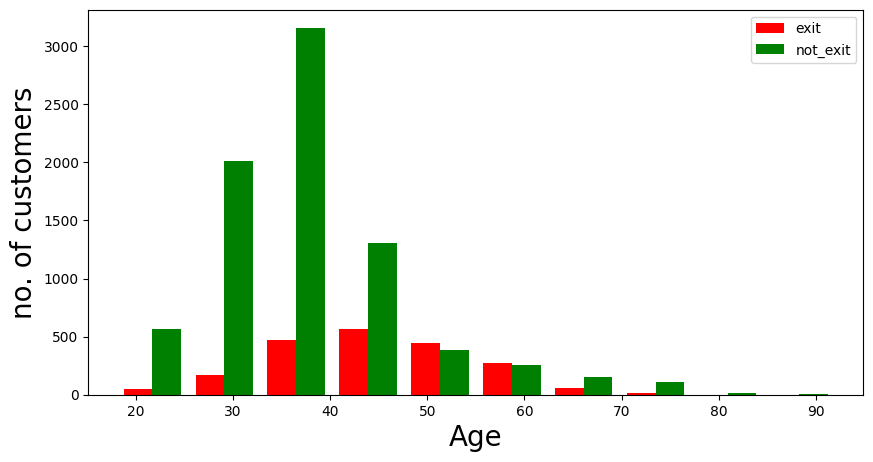

In [ ]:
visualization(df_churn_exited,df_churn_not_exited, 'Age')

##Converting the Categorical Variable

In [ ]:
x = df[['CreditScore','Age','Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
states = pd.get_dummies(df['Geography'], drop_first= True)
gender = pd.get_dummies(['Gender'],drop_first= True)

In [ ]:
df = pd.concat([df,states,gender], axis= 1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


##Splitting the training and testing Dataset

In [ ]:
x = df[['CreditScore','Age','Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]


In [ ]:
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30)

#Normalizing the value with means as 0 and Standard Deviation as 1

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Ensure that the shape of the scaled data remains the same
print(x_train_scaled.shape)


(7000, 8)


In [ ]:
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [ ]:
#x_train

In [ ]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3771,477,34,8,139959.55,2,1,1,189875.83
3257,707,58,3,102346.86,1,1,1,114672.64
9530,667,41,6,0.00,2,0,0,167181.77
8411,619,56,7,0.00,2,1,1,42442.21
6023,786,33,0,83036.05,1,0,1,154990.58
...,...,...,...,...,...,...,...,...
7460,647,30,6,143138.91,2,1,0,2955.46
8122,564,53,2,45472.28,1,1,1,41055.71
1736,633,29,0,138577.34,1,1,0,193362.99
1727,676,36,4,0.00,2,1,1,3173.31


###Building the Classifier Model using Keras

keras is wrapper on the top of TensorFlow

Can use TensorFlow as well but won't able to understand the error initially

In [ ]:
import keras

In [ ]:
from keras.models import Sequential  #To create sequential neural network
from keras.layers import Dense       #To create hidden layers

# Create the Sequential model
classifier = Sequential()

# Add the input layer and hidden layers
#@classifier.add(Dense(units=256, input_dim=8, activation='relu'))  # Adjust units if necessary
classifier.add(Dense(activation = "relu", input_dim = 8, units = 6, kernel_initializer= "uniform"))
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer= "uniform")) #Adding second hidden layer
# Add the output layer with one unit and 'sigmoid' activation for binary classification
#@classifier.add(Dense(units=1, activation='sigmoid'))
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer= "uniform")) #final layer or output layer
# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Input Layer:
As the name suggests, it accepts inputs in several different formats provided by the programmer.


Hidden Layer: The hidden layer presents in-between input and output layers. It performs all the
calculations tond hidden features and patterns.


Output Layer:
The input goes through a series of transformations using the hidden layer, which finally results in
output that is conveyed using this layer.
The artificial neural network takes input and computes the weighted sum of the inputs and
includes a bias. This computation is represented in the form of a transfer function.


In [ ]:
classifier.summary() # 3 layers created in 1st, 6 neurons in 2nd layer and 1 neuron in last

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 6)                 54        
                                                                 
 dense_36 (Dense)            (None, 6)                 42        
                                                                 
 dense_37 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model to the training dataset
classifier.fit(x_train, y_train, batch_size=10, epochs=50)

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7947
Epoch 2/50
700/700 [==============================] - 2s 3ms/step - loss: 0.5309 - accuracy: 0.7964
Epoch 3/50
700/700 [==============================] - 2s 3ms/step - loss: 0.5187 - accuracy: 0.7964
Epoch 4/50
700/700 [==============================] - 2s 2ms/step - loss: 0.5136 - accuracy: 0.7964
Epoch 5/50
700/700 [==============================] - 2s 2ms/step - loss: 0.5121 - accuracy: 0.7964
Epoch 6/50
700/700 [==============================] - 2s 2ms/step - loss: 0.5090 - accuracy: 0.7964
Epoch 7/50
700/700 [==============================] - 2s 2ms/step - loss: 0.5030 - accuracy: 0.7964
Epoch 8/50
700/700 [==============================] - 2s 2ms/step - loss: 0.5024 - accuracy: 0.7964
Epoch 9/50
700/700 [==============================] - 2s 3ms/step - loss: 0.5023 - accuracy: 0.7964
Epoch 10/50
700/700 [==============================] - 3s 4ms/step - loss: 0.5018 - accuracy: 0.7964

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)   #Predicting the result

94/94 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[2388,    0],
       [ 612,    0]])

In [ ]:
print(type(cm))

<class 'numpy.ndarray'>


In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
accuracy

0.796

Text(95.72222222222221, 0.5, 'Truth')

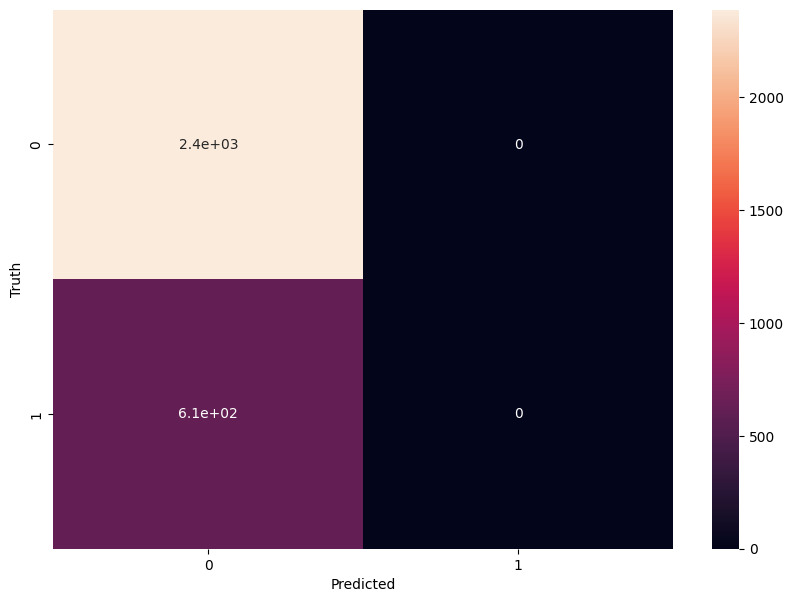

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2388
           1       0.00      0.00      0.00       612

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
